In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [106]:
folder_path = '/Users/andrejsmirnov/PycharmProjects/ML2/ML_2_mod/ML4/Landscape'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpeg', '.jpg'))]

images = []
for filename in image_files:
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)
    if image is not None:
        images.append(image)

images_hog = []
desired_size = (200, 200)
for img in images:
    resized_img = cv2.resize(img, desired_size)
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    images_hog.append(hog_image_rescaled)
    

In [107]:
folder_path = '/Users/andrejsmirnov/PycharmProjects/ML2/ML_2_mod/ML4/Cow'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpeg', '.jpg'))]
image_files = image_files[0:10]

images = []
for filename in image_files:
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)
    if image is not None:
        images.append(image)

images_hog_cow = []
desired_size = (200, 200)
for img in images:
    resized_img = cv2.resize(img, desired_size)
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
    images_hog_cow.append(hog_image_rescaled)

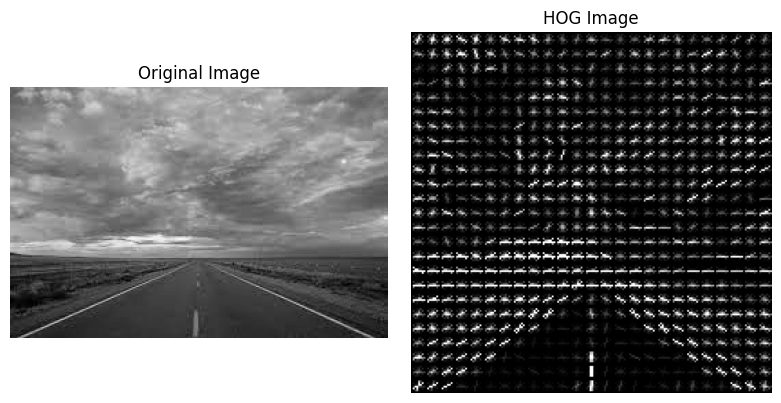

In [108]:
hog_image_rescaled = images_hog[2]
gray_img = cv2.cvtColor(cv2.imread('/Users/andrejsmirnov/PycharmProjects/ML2/ML_2_mod/ML4/Landscape/001.jpeg'), cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.title('HOG Image')
plt.axis('off')

plt.tight_layout()
plt.show()


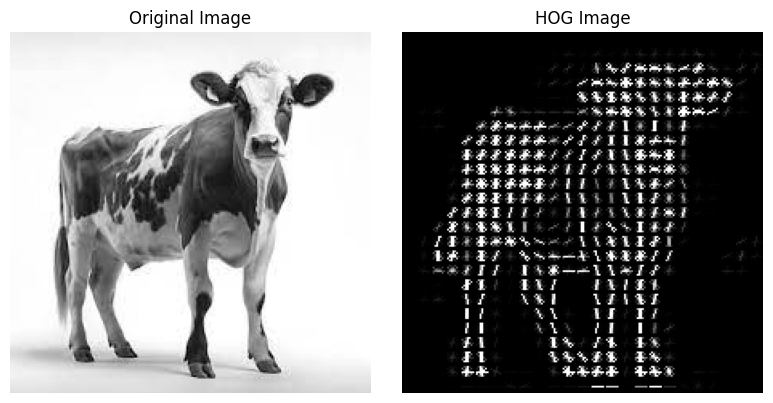

In [109]:
hog_image_rescaled = images_hog_cow[1]
gray_img = cv2.cvtColor(cv2.imread('/Users/andrejsmirnov/PycharmProjects/ML2/ML_2_mod/ML4/Cow/003.jpeg'), cv2.COLOR_BGR2GRAY)

# Отображение HOG-изображения
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.title('HOG Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [110]:
cow_image_files = images_hog
landscape_image_files = images_hog_cow

cow_data = pd.DataFrame({'img_hog': cow_image_files, 'label': 1})
landscape_data = pd.DataFrame({'img_hog': landscape_image_files, 'label': 0})

data = pd.concat([cow_data, landscape_data], ignore_index=True)

data.head()

,img_hog,label
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1


In [111]:
X = np.array(data['img_hog'].to_list())  # Признаки
y = data['label'].values  # Метки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train.reshape(len(X_train), -1), y_train)  # reshape для корректной формы массива

accuracy = model.score(X_test.reshape(len(X_test), -1), y_test)  # reshape для корректной формы массива
print("Accuracy:", accuracy)

Accuracy: 0.75
